# Elementary Particles Notebook
## Simulation of a process

In the lecture we have broadly seen how the Higgs boson can be produced according to the Standard Model. In this notebook we will look closely at the theory prediction in simulated data made public by the ATLAS experiment


---
## Importing packages
We start by importing the packages we will need to load the data and display the results.

In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/10


---
## Loading data
We then load the simulated data that we want to analyze. As mentioned, this is simulated data that has been made public by the ATLAS experiment. This data doesn't come directly from the detector, but it's a simulation obtained by a software which shows how the Higgs boson data would look like in the experiment.

In [2]:
f = ROOT.TFile.Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/GamGam/MC/mc_343981.ggH125_gamgam.GamGam.root")

In [3]:
tree = f.Get("mini")

The `tree` variable now contains all the information we need. To begin with, let's see exactly how many events we have to analyze.

In [4]:
aantal_events = tree.GetEntries()
print(aantal_events)

1054711


That's quite a few events!

## The Higgs boson production
The process we are going to look at is

$$gg \rightarrow H \rightarrow \gamma \gamma.$$

We need to compute the invariant mass of the Higgs, and (because that value is invariant) of the two photons.

In [5]:
def invariante_massa_2(pt1, pt2, eta1, eta2, phi1, phi2):
    #dummy value. Fill in with your implementation of the invariant mass
    return 1

We want to store many information for later plotting in a histogram (the standard method for presenting these kinds of results). For this reason we create lists to store these values.

In [6]:
invariante_massas = []
invariante_massas_aux = []
var_y1 = []
var_y2 = []

We could now loop over all events with a `for` loop, selecting them one by one with `GetEvent()`. However, this is a bit cumbersome, because it can also be done immediately with

    for event in tree:

This does this for us right away, so we don't need a `GetEvent()` statement anymore.

In this loop, we're going to do two kinds of things:

1. We are going to select events by their properties. Only events that have the right properties should be included in our analysis.
2. We are going to calculate the invariant masses for the events that survived our cuts and store it in `invariant_mass`.

Which properties do we want to select on? Well, our final state contains two photons, so we're going to discard any event that contains less than 2 photons. We could, with a more complicated analysis, also use events with more than 2 photons, but to keep the simplicity we discard those as well.

All this gives us the following analysis:

In [7]:
for i, event in enumerate(tree):
    # Stop the analysis when we have analyzed more than 10000 events.
    # We do this to finish faster. For a full analysis
    # we remove this if statement.
    if i > 1e3:
        break
    # Print how far you are now
    if (i+1)%10000 == 0:
        print("Analyseren van event {} van de {}".format(i+1, aantal_events))
        
    # Ignore all events with != 2 photons
        #Fill in with your implementation
        
    # Calculate the invariant mass of the remaining events
    s = 1000 #dummy value... Fill in with your implementation
    invariante_massas.append( s/1000 )
    
    # Save additional information about the properties of the two photons
    #dummy values... Fill in with your implementation
    var_y1.append(1)
    var_y2.append(1)
    
    # Implement new selection cuts to make the analysis more complex 
    if (True): #dummy value... Fill in with your implementation
        invariante_massas_aux.append( s/1000 )
    
print("Done!")

Done!


We then make the histogram very easily with matplotlib

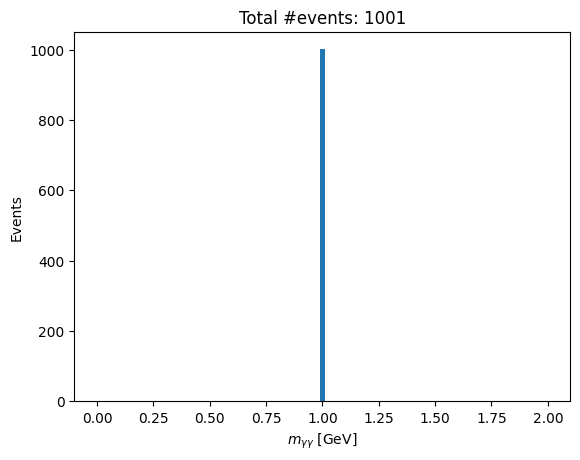

In [12]:
bins = np.linspace(0, 2, 100) #0 and 2 are dummy values for the x-axis. Find a proper range around the Higgs boson mass
plt.hist(invariante_massas, bins)
plt.title("Total #events: {}".format(len(invariante_massas)))
plt.xlabel("$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events")
plt.show()

This is how the Higgs boson resonance (i.e. our **signal**) would look like if we could separate it completely from the non-resonant production of two photons (i.e. our **background**): a narrow peak centered around the Higgs mass. Note that this is an important feature of the Higgs decay into two photons: the resolution of $m_{\gamma\gamma}$ in this channel is very small (so very good!), just a few GeV, which makes the recognition of the signal easier when looking at the data.
We have already discussed why we can't see it clearly in our (limited) data sample, but let's now try to improve the picture.


---
## Properties of the photons
In the events that we want to select, the photons should be of "good quality". The quality depends on how well these objects are reconstructed in the detector. For example, the electromagnetic calorimeter is more efficient in the "central" region, i.e. $|\eta|<1$.
Good-quality photons will result in a better $m_{\gamma\gamma}$ resolution, which makes our signal stand out even more in our plots. 
First of all, let's check the distributions of some variables ($\phi$, $\eta$, ...) that might help us to identify a good-quality region.

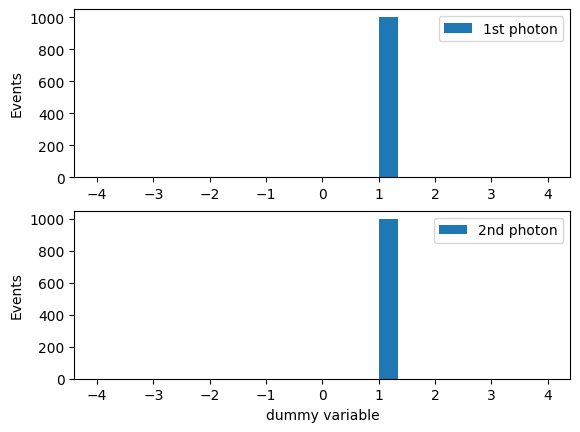

In [9]:
bins = np.linspace(-4, 4, 25)
plt.subplot(2, 1, 1)
plt.hist(var_y1, bins, label='1st photon')
plt.ylabel("Events")
plt.legend(loc='upper right')
plt.subplot(2, 1, 2)
plt.hist(var_y2, bins, label='2nd photon')
plt.ylabel("Events")
plt.legend(loc='upper right')
plt.xlabel("dummy variable")
plt.show()

After inspecting the properties of the photons that we are going to work with, we can try to improve our selection in order to have a better resolution. This can be done by implementing additional cuts in the event-loop.

We also want to compare with the baseline selection (i.e. just the requirement of two photons) and in order to quantify the result we can use the **standard deviation** of the distributions as a proxy for the resolution.

/usr/lib/python3/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


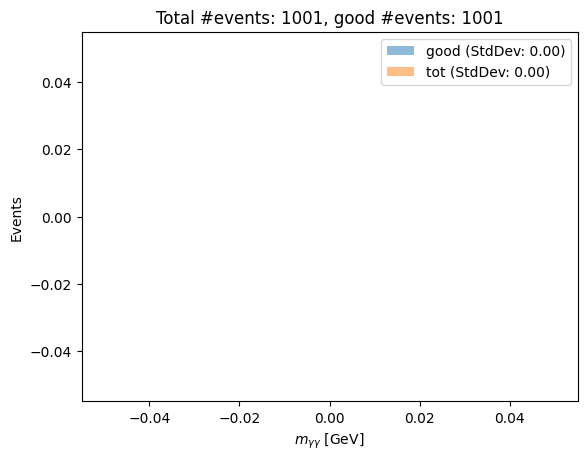

In [10]:
bins = np.linspace(110, 140, 30)
plt.hist(invariante_massas_aux, bins, alpha=0.5, label='good (StdDev: {:.2f})'.format(np.std(invariante_massas_aux)), density=True)
plt.hist(invariante_massas, bins, alpha=0.5, label='tot (StdDev: {:.2f})'.format(np.std(invariante_massas)), density=True)
plt.title("Total #events: {}, good #events: {}".format(len(invariante_massas), len(invariante_massas_aux)))
plt.legend(loc='upper right')
plt.xlabel("$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events")
plt.show()

After selecting only good-quality photons the signal resolution is improved and the peak looks narrower!
This is just an example of some techniques that can be used to improve the analysis.